In [1]:
import cv2
import numpy as np

# Load Video
cap = cv2.VideoCapture("C:/Users/Srinu's Laptop/Documents/Downloads/12306119_1080_1920_30fps.mp4")
bg_subtractor = cv2.createBackgroundSubtractorMOG2()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Person Detection using Background Subtraction
    fg_mask = bg_subtractor.apply(frame)
    _, thresh = cv2.threshold(fg_mask, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        # Filtering small contours
        if cv2.contourArea(cnt) > 500:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, "Person", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Show the output frame
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


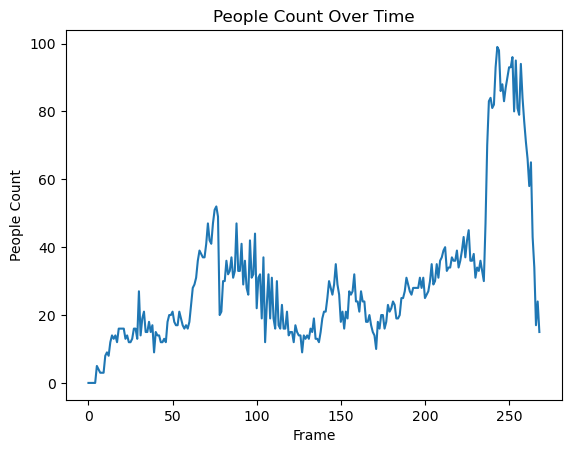

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("C:/Users/Srinu's Laptop/Documents/Downloads/1903270-uhd_1920_1440_30fps.mp4")
bg_subtractor = cv2.createBackgroundSubtractorMOG2()
people_counts = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    fg_mask = bg_subtractor.apply(frame)
    _, thresh = cv2.threshold(fg_mask, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    people_counts.append(len([cnt for cnt in contours if cv2.contourArea(cnt) > 500]))

# Plotting people count over time
time_intervals = np.arange(len(people_counts))
plt.plot(time_intervals, people_counts)
plt.xlabel("Frame")
plt.ylabel("People Count")
plt.title("People Count Over Time")
plt.show()


In [3]:
import cv2

# Load reference image and video
reference_image = cv2.imread("C:/Users/Srinu's Laptop/OneDrive - vit.ac.in/Pictures/srinu.jpg")
video = cv2.VideoCapture(r"C:/Users/Srinu's Laptop/Documents/Downloads/7647783-hd_1920_1080_30fps.mp4")
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break

    # Detect faces in frame and reference image
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, 1.3, 5)
    
    # Draw bounding boxes for detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    cv2.imshow('Detected Faces', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()


In [4]:
import cv2

cap = cv2.VideoCapture("C:/Users/Srinu's Laptop/Documents/Downloads/12619983_3840_2160_60fps.mp4")
bg_subtractor = cv2.createBackgroundSubtractorMOG2()
enter_count, exit_count = 0, 0
ROI_y = 200  # y-coordinate threshold to determine entry/exit

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    fg_mask = bg_subtractor.apply(frame)
    _, thresh = cv2.threshold(fg_mask, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            x, y, w, h = cv2.boundingRect(cnt)
            if y < ROI_y:  # assuming entry/exit based on y-coordinate
                enter_count += 1
            else:
                exit_count += 1

    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print(f"Total Entered: {enter_count}, Total Exited: {exit_count}")


Total Entered: 1856, Total Exited: 32903


In [5]:
import cv2
import time

cap = cv2.VideoCapture("C:/Users/Srinu's Laptop/Documents/Downloads/2252824-uhd_3840_2160_30fps.mp4")
bg_subtractor = cv2.createBackgroundSubtractorMOG2()
dwelling_time = {}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    fg_mask = bg_subtractor.apply(frame)
    _, thresh = cv2.threshold(fg_mask, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            x, y, w, h = cv2.boundingRect(cnt)
            id = (x, y, w, h)  # simple ID based on bounding box
            dwelling_time[id] = dwelling_time.get(id, 0) + 1  # Increment dwell time

cap.release()
print("Dwelling Time for each detected object:", dwelling_time)


Dwelling Time for each detected object: {(560, 2088, 139, 72): 1, (3694, 2080, 55, 80): 1, (3311, 2077, 70, 73): 1, (2634, 2065, 122, 95): 1, (1073, 2063, 73, 84): 1, (2984, 2044, 158, 60): 1, (1665, 2036, 27, 54): 1, (3684, 2014, 46, 54): 1, (991, 1973, 79, 91): 1, (1366, 1956, 132, 74): 1, (3746, 1951, 48, 36): 1, (1034, 1942, 225, 180): 1, (1278, 1939, 48, 51): 1, (681, 1936, 185, 57): 1, (3161, 1930, 62, 49): 1, (2295, 1919, 722, 93): 1, (353, 1914, 102, 70): 1, (1199, 1905, 28, 65): 1, (733, 1872, 172, 75): 1, (2756, 1871, 111, 39): 1, (2117, 1856, 159, 15): 1, (1237, 1855, 21, 105): 1, (1260, 1847, 17, 86): 1, (3640, 1835, 50, 57): 1, (267, 1832, 332, 92): 1, (1347, 1823, 254, 90): 1, (936, 1816, 87, 26): 1, (2282, 1795, 548, 85): 1, (377, 1791, 61, 49): 1, (836, 1780, 65, 44): 1, (1687, 1771, 184, 264): 1, (2575, 1767, 117, 51): 1, (1335, 1767, 186, 51): 1, (3732, 1750, 108, 46): 1, (1976, 1748, 691, 41): 1, (1030, 1725, 154, 40): 1, (3469, 1711, 36, 97): 1, (3611, 1709, 57, 59)

In [6]:
import cv2

cap = cv2.VideoCapture("C:/Users/Srinu's Laptop/Documents/Downloads/2053855-uhd_3840_2160_30fps.mp4.crdownload")
bg_subtractor = cv2.createBackgroundSubtractorMOG2()
branded_car_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    fg_mask = bg_subtractor.apply(frame)
    _, thresh = cv2.threshold(fg_mask, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            x, y, w, h = cv2.boundingRect(cnt)
            car_roi = frame[y:y + h, x:x + w]

            
            brand_color = np.array([255, 0, 0])  
            if np.mean(car_roi) > np.mean(brand_color): 
                branded_car_count += 1
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print(f"Total branded cars detected: {branded_car_count}")


Total branded cars detected: 0
